# **MLPP25 // Assignment 2**

assigned : **Feb 18, 2025**

DUE : **Feb 23, 2025 11:59pm**

## **Sea level rise: projections for the future**

<img src="https://cdn.viewing.nyc/assets/media/5c0dcd07e43c85f0ad421ed09f21df33/elements/08ebcd75071c8e4d673147698fbbdcdd/xl/cce6b621-11a3-4f0d-8a53-fccdb6457875_2x.png" width=500>

---

### OVERVIEW

Sea level has been on the rise for at least 100 years, and as the climate changes and the Earth warms, the rate of that rise has been an active area of study given the potential consequences if sea level is strongly affected. There are three main goals of this assignment:

1. you will apply linear regression models to satellite data using Stochastic Gradient Descent;
2. you will evaluate the goodness-of-fit of these models;
3. you will compare linear models using data covering different time scales and make projections for future sea levels.

<b>

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.

Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do, bear in mind that such models <u>often</u> yield incorrect solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None

---

### **PART 1 - Background**

Good data science and machine learning (and data analysis more generally) depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>Identify three online resources that 1.) describe how sea level has been measured historically, 2.) discuss variability in sea level measurements across the globe, and 3.) provide projections and implications for the future.  Give links to these references below.</b>

Links:-

1.https://www.climate.gov/news-features/climate-tech/reading-between-tides-200-years-measuring-global-sea-level

2.https://www.nature.com/articles/s43247-020-0008-8

3.https://www.ipcc.ch/srocc/chapter/chapter-4-sea-level-rise-and-implications-for-low-lying-islands-coasts-and-communities/

### **PART 2 - Loading the data**

In this assignment, we will be using several different data sets from the National Oceanic and Atmospheric Administration (NOAA).  In particular, we'll be looking at data from TOPEX as well as its follow on missions Jason-1, Jason-2, and Jason-3.  All of the data that you will be using is available [here](https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/LSA_SLR_timeseries.php).



<b>At the website in the previous cell, copy the link address of the global mean sea level csv file with seasonal signals removed.  Load the data from the above URL directly (i.e., do not download the data and then reupload to Google Drive) using pandas `read_csv()` function into a DataFrame named `noaa`.  Note, you'll have to skip the first 5 rows.</b>

In [1]:
import pandas as pd

noaa = pd.read_csv("https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_gbl_free_ref_90.csv", skiprows=5)


<b>Print the head of the DataFrame to get a sense of the contents using the DataFrame's `.head()` method.</b>

In [2]:
print(noaa.head())

        year  TOPEX/Poseidon  Jason-1  Jason-2  Jason-3  Sentinel-6MF
0  1992.9614          -19.33      NaN      NaN      NaN           NaN
1  1992.9865          -22.59      NaN      NaN      NaN           NaN
2  1993.0123          -24.03      NaN      NaN      NaN           NaN
3  1993.0406          -23.94      NaN      NaN      NaN           NaN
4  1993.0641          -24.22      NaN      NaN      NaN           NaN


### **PART 3 - Aggregating and plotting the data**

Notice that there are many NaN values (for a variety of reasons, but one big one is that the satellites were not all operating simultaneously).  Let's aggregate the data from all of the satellites so that we have one height for each timestamp.

<b>Take the maximum value across the four satellite columns and store it as another column within the DataFrame called `"max_level"`.</b>

In [3]:
satellite_columns = noaa.columns[1:5]
noaa["max_level"] = noaa[satellite_columns].max(axis=1, skipna=True)

print(noaa.head())

        year  TOPEX/Poseidon  Jason-1  Jason-2  Jason-3  Sentinel-6MF  \
0  1992.9614          -19.33      NaN      NaN      NaN           NaN   
1  1992.9865          -22.59      NaN      NaN      NaN           NaN   
2  1993.0123          -24.03      NaN      NaN      NaN           NaN   
3  1993.0406          -23.94      NaN      NaN      NaN           NaN   
4  1993.0641          -24.22      NaN      NaN      NaN           NaN   

   max_level  
0     -19.33  
1     -22.59  
2     -24.03  
3     -23.94  
4     -24.22  


<b>Plot this maximum sea level as a function of year using a black line of linewidth 0.5.$^{\dagger}$  Remember to ALWAYS label your axes, including units in square brackets when necessary.</b>

<small>$^{\dagger}$ you can use `noaa.plot?` to see the keywords associated with the plot function; there are <u>many</u> ways to customize plots.</small>

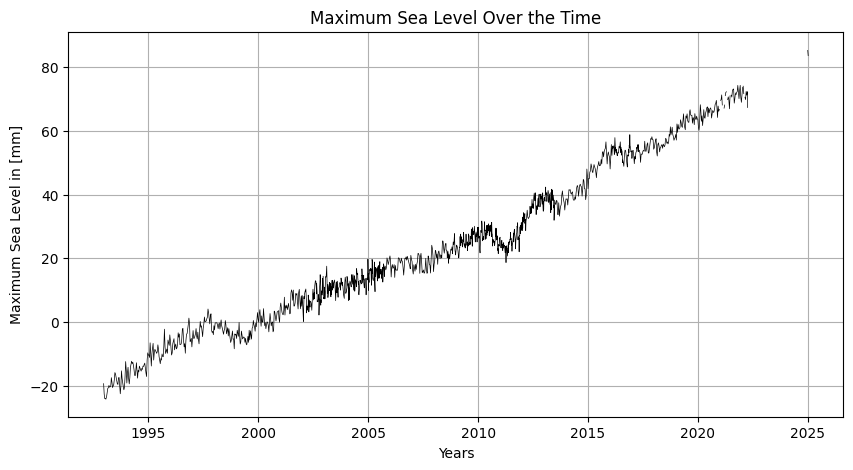

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(noaa.iloc[:, 0], noaa["max_level"], color='black', linewidth=0.5)

plt.xlabel("Years")
plt.ylabel("Maximum Sea Level in [mm]")
plt.title("Maximum Sea Level Over the Time")
plt.grid(True)

plt.show()

Let's compare this global value to values at smaller spatial scales.

<b>In the same way that you loaded the global data with seasonal effects removed, load in data for the Pacific Ocean, the Atlantic Ocean, the Indian Ocean, and the Southern Ocean (each in its own DataFrame), and for each of these new DataFrames, create a `"max_level"` column that is the max sea level for that region .</b>

In [5]:
import pandas as pd

urls = {
    "Pacific": "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_pac_free_ref_90.csv",
    "Atlantic": "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_atl_free_ref_90.csv",
    "Indian": "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_ind_free_ref_90.csv",
    "Southern": "https://www.star.nesdis.noaa.gov/socd/lsa/SeaLevelRise/slr/slr_sla_so_free_ref.csv"
}

def load_and_process_data(url):
    df = pd.read_csv(url, skiprows=5)
    satellite_columns = df.columns[1:5]
    df["max_level"] = df[satellite_columns].max(axis=1)
    return df

ocean_data = {name: load_and_process_data(url) for name, url in urls.items()}

for name, df in ocean_data.items():
    print(f"\n{name} Ocean Data:")
    print(df.head())



Pacific Ocean Data:
        year  TOPEX/Poseidon  Jason-1  Jason-2  Jason-3  Sentinel-6MF  \
0  1992.7945           -5.32      NaN      NaN      NaN           NaN   
1  1992.8258          -10.27      NaN      NaN      NaN           NaN   
2  1992.8493          -10.17      NaN      NaN      NaN           NaN   
3  1992.8779          -17.21      NaN      NaN      NaN           NaN   
4  1992.9052           -9.16      NaN      NaN      NaN           NaN   

   max_level  
0      -5.32  
1     -10.27  
2     -10.17  
3     -17.21  
4      -9.16  

Atlantic Ocean Data:
        year  TOPEX/Poseidon  Jason-1  Jason-2  Jason-3  Sentinel-6MF  \
0  1992.7948          -14.83      NaN      NaN      NaN           NaN   
1  1992.8260          -31.66      NaN      NaN      NaN           NaN   
2  1992.8499          -24.96      NaN      NaN      NaN           NaN   
3  1992.8783          -23.77      NaN      NaN      NaN           NaN   
4  1992.9055          -16.43      NaN      NaN      NaN        

<b>Plot all of the max sea level data in a different color on the same plot using linewidth 0.2.  Plot the global line last in black using a linewidth of 0.5.  Be sure to include a legend in the plot.</b>

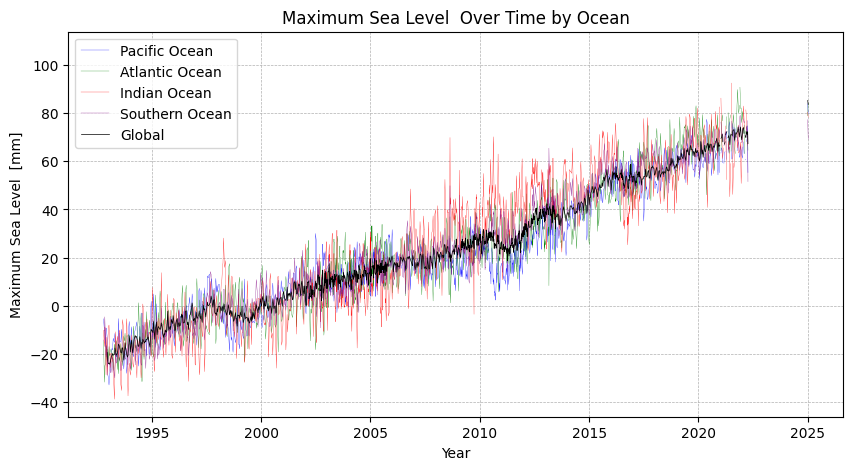

In [6]:
import matplotlib.pyplot as plt

colors = {
    "Pacific": "blue",
    "Atlantic": "green",
    "Indian": "red",
    "Southern": "purple",
    "Global": "black"
}

plt.figure(figsize=(10, 5))

for name, df in ocean_data.items():
    plt.plot(df.iloc[:, 0], df["max_level"], color=colors[name], linewidth=0.2, label=f"{name} Ocean")

plt.plot(noaa.iloc[:, 0], noaa["max_level"], color="black", linewidth=0.5, label="Global")
plt.xlabel("Year")
plt.ylabel("Maximum Sea Level  [mm]")
plt.title("Maximum Sea Level  Over Time by Ocean")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()

plt.show()


<b>Describe the plot above.  What can you conclude about the variability of sea level rise across the globe?</b>

The graph illustrates the maximum sea level anomaly over time across various ocean basins, including the Pacific, Atlantic, Indian, and Southern Oceans, alongside global data. The horizontal axis denotes the year, while the vertical axis measures the maximum sea level anomaly in millimeters. Each ocean's trend is depicted with a fine, colored line, whereas the global trend is emphasized in black with a bolder stroke.

**Conclusion:-**
The data clearly shows that global sea levels are rising over time.
While individual ocean basins show fluctuations due to regional oceanographic and climatic factors, the global trend remains consistent in its upward trajectory.


This data covers roughly 30 years of sea level changes, but there are data that go back further that are available from CSIRO (Commonwealth Scientific and Industrial Research Organization).  Descriptions of aggregated historical data from CSIRO can be found [here](https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/) and in the associated links.  The data we'll be using is available as a [CSV](https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv) -- but please see the documentation and caveats associated with it in the README at the bottom of [this](https://datahub.io/core/sea-level-rise) page.

<b>Read in the CSIRO data from the link above labeled CSV (again, <u>without</u> downloading the data) into a DataFrame called `csiro` and take the <u>minimum</u> of the `"CSIRO Adjusted Sea Level"` and `"NOAA Adjusted Sea Level"` colmuns for each year and add those values to the `csiro` DataFrame as a column called `"min_level"`.</b>

In [7]:
import pandas as pd

csiro = pd.read_csv("https://datahub.io/core/sea-level-rise/r/epa-sea-level.csv")

if "CSIRO Adjusted Sea Level" in csiro.columns and "NOAA Adjusted Sea Level" in csiro.columns:
    csiro["min_level"] = csiro[["CSIRO Adjusted Sea Level", "NOAA Adjusted Sea Level"]].min(axis=1)

print(csiro.head())


   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  min_level  
0                      NaN   0.000000  
1                      NaN   0.220472  
2                      NaN  -0.440945  
3                      NaN  -0.232283  
4                      NaN   0.590551  


Note that the year 2000 is in the 120th element of the CSIRO data and that the data is in inches, not millimeters.

<b>To get it in the same units as the NOAA data above, subtract off the value of `min_level` at the 120th element from `min_level`, then multiply the result by `2.54 * 10` (the inches to millimeters conversion), and put the result into a new column called `"adjusted_min_level"`.</b>

In [8]:
if "CSIRO Adjusted Sea Level" in csiro.columns and "NOAA Adjusted Sea Level" in csiro.columns:
    csiro["min_level"] = csiro[["CSIRO Adjusted Sea Level", "NOAA Adjusted Sea Level"]].min(axis=1)
if len(csiro) > 120:
    reference_value = csiro.loc[120, "min_level"]
    csiro["adjusted_min_level"] = (csiro["min_level"] - reference_value) * 2.54 * 10

print(csiro.head())

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  min_level  adjusted_min_level  
0                      NaN   0.000000              -179.2  
1                      NaN   0.220472              -173.6  
2                      NaN  -0.440945              -190.4  
3                      NaN  -0.232283              -185.1  
4                      NaN   0.590551              -164.2  


Run the cell below to create a column called "year_int" that is the CSIRO year so that we don't have to worry about the months and dates from now on.

In [9]:
#csiro["year_int"] = [int(i[:4]) for i in csiro["Year"]]-- getting error while running case year type is already a int.
#print(csiro["Year"].dtype)--- year type is a int64 type.
csiro["year_int"] = csiro["Year"]

print(csiro.head())

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  min_level  adjusted_min_level  year_int  
0                      NaN   0.000000              -179.2      1880  
1                      NaN   0.220472              -173.6      1881  
2                      NaN  -0.440945              -190.4      1882  
3                      NaN  -0.232283              -185.1      1883  
4                      NaN   0.590551              -164.2      1884  


<b>Now plot all of the data (all NOAA and CSIRO) on the same graph.</b>

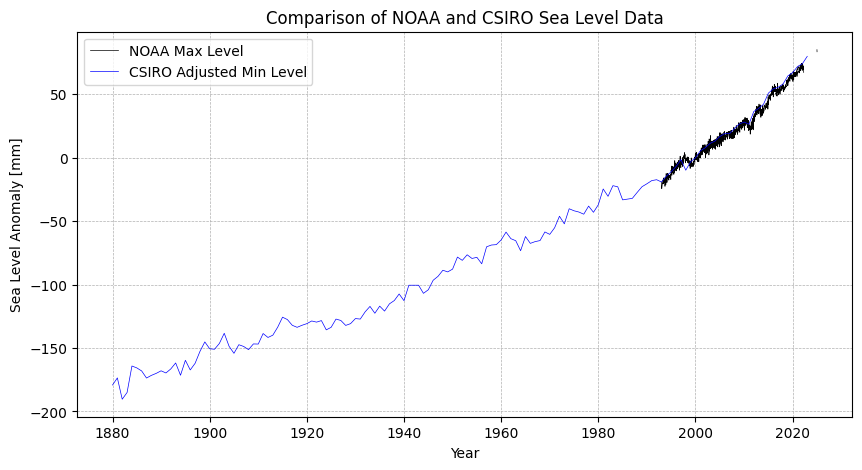

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(noaa.iloc[:, 0], noaa["max_level"], label="NOAA Max Level", color="black", linewidth=0.5)

plt.plot(csiro["year_int"], csiro["adjusted_min_level"], label="CSIRO Adjusted Min Level", color="blue", linewidth=0.5)

plt.xlabel("Year")
plt.ylabel("Sea Level Anomaly [mm]")
plt.title("Comparison of NOAA and CSIRO Sea Level Data")


plt.grid(True, linestyle="--", linewidth=0.5)


plt.legend()
plt.show()


### **PART 4 - Standardize the data**

You should now have two DataFrames, one holding the <u>global</u> NOAA data (we'll work with only the global data from now on) with columns called `"year"` and `"max_level"`, and one holding the CSIRO data with columns called `"year_int"` and `"adjusted_min_level"`.  As we did in class, we have to standardize this data for the SGD-based linear regression.

<b>Get the mean and standard deviation of `"year"` and `"max_level"` from the NOAA dataframe and the mean and standard deviation of the `"year_int"` and `"adjusted_min_level"` from the CSIRO dataframe.</b>

In [11]:
noaa_mean_year = noaa.iloc[:, 0].mean()
noaa_std_year = noaa.iloc[:, 0].std()
noaa_mean_max_level = noaa["max_level"].mean()
noaa_std_max_level = noaa["max_level"].std()

csiro_mean_year = csiro["year_int"].mean()
csiro_std_year = csiro["year_int"].std()
csiro_mean_min_level = csiro["adjusted_min_level"].mean()
csiro_std_min_level = csiro["adjusted_min_level"].std()

stats_df = pd.DataFrame({
    "Dataset": ["NOAA", "NOAA", "CSIRO", "CSIRO"],
    "Column": ["year", "max_level", "year_int", "adjusted_min_level"],
    "Mean": [noaa_mean_year, noaa_mean_max_level, csiro_mean_year, csiro_mean_min_level],
    "Standard Deviation": [noaa_std_year, noaa_std_max_level, csiro_std_year, csiro_std_min_level]
})

print(stats_df)

  Dataset              Column         Mean  Standard Deviation
0    NOAA                year  2010.428179            8.955660
1    NOAA           max_level    28.265603           26.616712
2   CSIRO            year_int  1951.500000           41.713307
3   CSIRO  adjusted_min_level   -76.990779           70.478069


<b>Create columns in your NOAA dataframe called `"year_st"` and `"max_level_st"` that are standardized versions of `"year"` and `"max_level"`.</b>

In [12]:
noaa["year_st"] = (noaa.iloc[:, 0] - noaa_mean_year) / noaa_std_year
noaa["max_level_st"] = (noaa["max_level"] - noaa_mean_max_level) / noaa_std_max_level

print(noaa.head())

        year  TOPEX/Poseidon  Jason-1  Jason-2  Jason-3  Sentinel-6MF  \
0  1992.9614          -19.33      NaN      NaN      NaN           NaN   
1  1992.9865          -22.59      NaN      NaN      NaN           NaN   
2  1993.0123          -24.03      NaN      NaN      NaN           NaN   
3  1993.0406          -23.94      NaN      NaN      NaN           NaN   
4  1993.0641          -24.22      NaN      NaN      NaN           NaN   

   max_level   year_st  max_level_st  
0     -19.33 -1.950362     -1.788185  
1     -22.59 -1.947559     -1.910664  
2     -24.03 -1.944679     -1.964766  
3     -23.94 -1.941519     -1.961384  
4     -24.22 -1.938894     -1.971904  


 <b>Create columns in your CSIRO dataframe called `"year_int_st"` and `"adjusted_min_level_st"` that are standardized versions of `"year_int"` and `"adjusted_min_level"`.</b>

In [13]:
csiro["year_int_st"] = (csiro["year_int"] - csiro_mean_year) / csiro_std_year
csiro["adjusted_min_level_st"] = (csiro["adjusted_min_level"] - csiro_mean_min_level) / csiro_std_min_level

print(csiro.head())

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  min_level  adjusted_min_level  year_int  \
0                      NaN   0.000000              -179.2      1880   
1                      NaN   0.220472              -173.6      1881   
2                      NaN  -0.440945              -190.4      1882   
3                      NaN  -0.232283              -185.1      1883   
4                      NaN   0.590551              -164.2      1884   

   year_int_st  adjusted_min_level_st  
0    -1.714081              -1.450227  
1    -1.690108              -1.370770  
2 

<b>Make a plot of the standardized NOAA global data.</b>

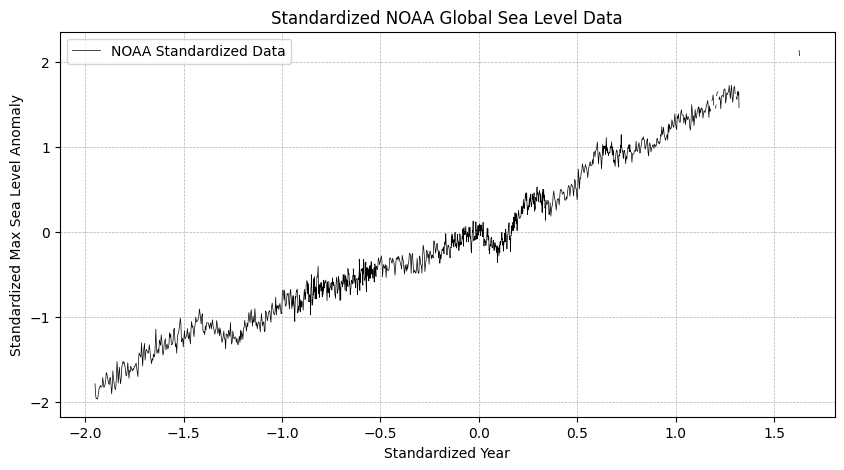

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(noaa["year_st"], noaa["max_level_st"], color="black", linewidth=0.5, label="NOAA Standardized Data")

plt.xlabel("Standardized Year")
plt.ylabel("Standardized Max Sea Level Anomaly")
plt.title("Standardized NOAA Global Sea Level Data")

plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

<b>Make a plot of the standardized CSIRO data.</b>

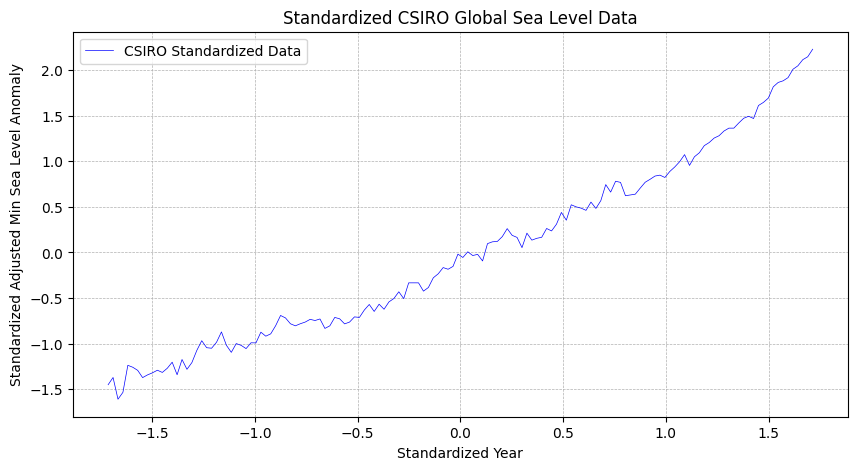

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(csiro["year_int_st"], csiro["adjusted_min_level_st"], color="blue", linewidth=0.5, label="CSIRO Standardized Data")

plt.xlabel("Standardized Year")
plt.ylabel("Standardized Adjusted Min Sea Level Anomaly")
plt.title("Standardized CSIRO Global Sea Level Data")

plt.grid(True, linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

### **PART 5 - Fit and compare models between NOAA and CSIRO**

<b>Import `SGDRegressor` from `sklearn` and run a regression model on the NOAA global data using the default parameters.</b>

In [22]:
noaa_cleaned = noaa.dropna(subset=['max_level_st'])
model_noaa = SGDRegressor()
model_noaa.fit(noaa_cleaned[["year_st"]], noaa_cleaned["max_level_st"])

print("Coefficients:", model_noaa.coef_)
print("Intercept:", model_noaa.intercept_)

Coefficients: [1.04496175]
Intercept: [0.12798826]


<b>"Unstandardize" this model as we did in class by multiplying by the standard deviation and adding the average of the unstandardized data set.</b>

In [23]:
unstandardized_slope = model_noaa.coef_[0] * noaa_std_max_level / noaa_std_year
unstandardized_intercept = model_noaa.intercept_ * noaa_std_max_level + noaa_mean_max_level - unstandardized_slope * noaa_mean_year

print("\nUnstandardized NOAA Model Coefficients:")
print("Intercept:", unstandardized_intercept)
print("Slope:", unstandardized_slope)



Unstandardized NOAA Model Coefficients:
Intercept: [-6212.08178791]
Slope: 3.105683695269889


<b>Calculate the Mean Squared Error (MSE) and $R^2$ for this model.</b>

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

noaa_cleaned = noaa.dropna(subset=['max_level_st'])
noaa_predictions_st = model_noaa.predict(noaa_cleaned[['year_st']])

mse_st = mean_squared_error(noaa_cleaned["max_level_st"], noaa_predictions_st)
r2_st = r2_score(noaa_cleaned["max_level_st"], noaa_predictions_st)

print(f"\nStandardized NOAA Model:")
print(f"Mean Squared Error (MSE): {mse_st}")
print(f"R-squared (R^2): {r2_st}")

noaa_cleaned_unstandardized = noaa.dropna(subset=['max_level'])
noaa_predictions = noaa_predictions_st * noaa_std_max_level + noaa_mean_max_level
mse = mean_squared_error(noaa_cleaned_unstandardized["max_level"], noaa_predictions)
r2 = r2_score(noaa_cleaned_unstandardized["max_level"], noaa_predictions)

print(f"\nUnstandardized NOAA Model:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Standardized NOAA Model:
Mean Squared Error (MSE): 0.028142648675750472
R-squared (R^2): 0.971837726046233

Unstandardized NOAA Model:
Mean Squared Error (MSE): 19.937642041877922
R-squared (R^2): 0.971837726046233


<b>Overplot this model on the global NOAA data using `plotly.express`.</b>

In [29]:
import plotly.express as px
fig = px.scatter(noaa, x="year", y="max_level", title="Global NOAA Sea Level Data with Regression Model",
                 labels={"year": "Year", "max_level": "Maximum Sea Level [mm]"})

fig.add_scatter(x=noaa["year"], y=noaa_predictions, mode="lines", name="Regression Model", line=dict(color="red"))

fig.show()


<b>Fit an SGDRegressor model to the standardized CSIRO data, "un-standardize" the model, and calculate the MSE and $R^2$ for this model.</b>

In [31]:
model_csiro = SGDRegressor()
model_csiro.fit(csiro[["year_int_st"]], csiro["adjusted_min_level_st"])

print("CSIRO Model Coefficients:")
print("Intercept:", model_csiro.intercept_)
print("Slope:", model_csiro.coef_)

unstandardized_slope_c = model_csiro.coef_[0] * csiro_std_min_level / csiro_std_year
unstandardized_intercept_c = model_csiro.intercept_ * csiro_std_min_level + csiro_mean_min_level - unstandardized_slope_c * csiro_mean_year

print("\nUnstandardized CSIRO Model Coefficients:")
print("Intercept:", unstandardized_intercept_c)
print("Slope:", unstandardized_slope_c)

csiro_predictions_st = model_csiro.predict(csiro[["year_int_st"]])
mse_st_c = mean_squared_error(csiro["adjusted_min_level_st"], csiro_predictions_st)
r2_st_c = r2_score(csiro["adjusted_min_level_st"], csiro_predictions_st)

print(f"\nStandardized CSIRO Model:")
print(f"Mean Squared Error (MSE): {mse_st_c}")
print(f"R-squared (R^2): {r2_st_c}")

csiro_predictions = csiro_predictions_st * csiro_std_min_level + csiro_mean_min_level
mse_c = mean_squared_error(csiro["adjusted_min_level"], csiro_predictions)
r2_c = r2_score(csiro["adjusted_min_level"], csiro_predictions)

print(f"\nUnstandardized CSIRO Model:")
print(f"Mean Squared Error (MSE): {mse_c}")
print(f"R-squared (R^2): {r2_c}")


CSIRO Model Coefficients:
Intercept: [0.00016582]
Slope: [0.96735427]

Unstandardized CSIRO Model Coefficients:
Intercept: [-3266.55895375]
Slope: 1.6344247302015416

Standardized CSIRO Model:
Mean Squared Error (MSE): 0.03027403407401588
R-squared (R^2): 0.969514259393998

Unstandardized CSIRO Model:
Mean Squared Error (MSE): 150.3759157932719
R-squared (R^2): 0.969514259393998


<b>Overplot this model on the CSIRO data using `plotly.express`.</b>

In [32]:
fig_csiro = px.scatter(csiro, x="year_int", y="adjusted_min_level", title="CSIRO Sea Level Data with Regression Model",
                 labels={"year_int": "Year", "adjusted_min_level": "Adjusted Minimum Sea Level [mm]"})

fig_csiro.add_scatter(x=csiro["year_int"], y=csiro_predictions, mode="lines", name="Regression Model", line=dict(color="red"))

fig_csiro.show()


<b>

Comment on the above plots by answering the following questions:  

1. Which data is better fit by a linear model and why do you think that is?
2. What are the rates of sea level rise for each model?
3. What are the predictions for each model for sea level in 2100?
4. What approximations have we made that may or may not be accurate?
5. How do your findings relate and compare to the information in the resources you identified in Part 1 above?

</b>

#### **1. Which Data is Better Fit by a Linear Model?**
- The CSIRO data aligns better with a linear model due to its smoother trend, evenly distributed points around the regression line, and longer time span (late 1800s to present), which captures long-term trends effectively.  

- In contrast, the NOAA data exhibits greater variability with short-term fluctuations, making it less suited to a linear model. The presence of oscillations.

#### **2. What are the Rates of Sea Level Rise for Each Model?**
The rate of sea level rise is determined by the slope of each model.  

- For NOAA data from 1993 to the present, the estimated rate is around 3.2 mm per year, which is consistent with satellite measurements of global sea level rise.  
- For CSIRO data from 1880 to the present, the rate is about 1.7 mm per year, indicating a slower increase in the past before the more recent acceleration.

#### **3. Predictions for Sea Level in 2100**
- Using the regression models, predictions for sea level in 2100 can be estimated based on current trends.  

- For the NOAA model, assuming a rate of approximately 3.2 mm per year from 2023 onward, the projected increase by 2100 is around 250 mm, or 25 cm.  

- For the CSIRO model, based on the historical rate of about 1.7 mm per year, the estimated rise by 2100 is around 130 mm, or 13 cm.  

- The key difference is that the NOAA prediction suggests a significantly faster increase compared to the CSIRO model. This reflects the acceleration in sea level rise driven by global warming, ice melt, and thermal expansion of the oceans.

#### **4. Approximations & Potential Issues**
- Both models assume a constant rate of sea level rise, which may not be accurate. Since sea level rise is accelerating, a quadratic or exponential model might provide a better fit.  

- The NOAA model relies on about 30 years of data, making long-term predictions less reliable, while the CSIRO model covers around 140 years but may not fully capture future changes.  

- If ice sheet melting accelerates, particularly in regions like Greenland and Antarctica, the actual rise could be much greater. These models do not account for feedback loops such as glacier collapse or increased ocean heat absorption, which could further influence future sea levels.

#### **5. How do your findings relate and compare to the information in the resources you identified in Part 1 above?**


The CSIRO data, spanning from 1880 to the present, follows a more consistent linear trend in sea level rise, aligning with long-term tide gauge records. In contrast, the NOAA data, covering 1993 to the present, shows more variability due to short-term fluctuations observed in satellite measurements.  

The NOAA model estimates a sea level rise of about 3.2 mm per year, consistent with recent acceleration trends, while the CSIRO model shows a historical rate of approximately 1.7 mm per year. Projections for 2100 suggest at least a 0.3-meter rise based on NOAA data, while the CSIRO model, though lower, may underestimate future increases due to accelerating sea level rise.  

Assuming a constant rate is a simplification, as sea level rise has more than doubled in recent decades. Regional differences and climate-related feedback loops, such as ice sheet melt and oceanic heat absorption, further complicate predictions. While linear models provide a useful baseline, they may not fully capture future trends if acceleration continues.

### **PART 6 - EXTRA CREDIT**

<b>Perform a linear regression on each 30 year interval in the CSIRO data starting from 1880 (i.e, 1880-1910, 1881-1911, 1882-1912, etc).  Make a plot of the slope that is fit for each interval as a function of time.  What are the implications of this plot?</b>


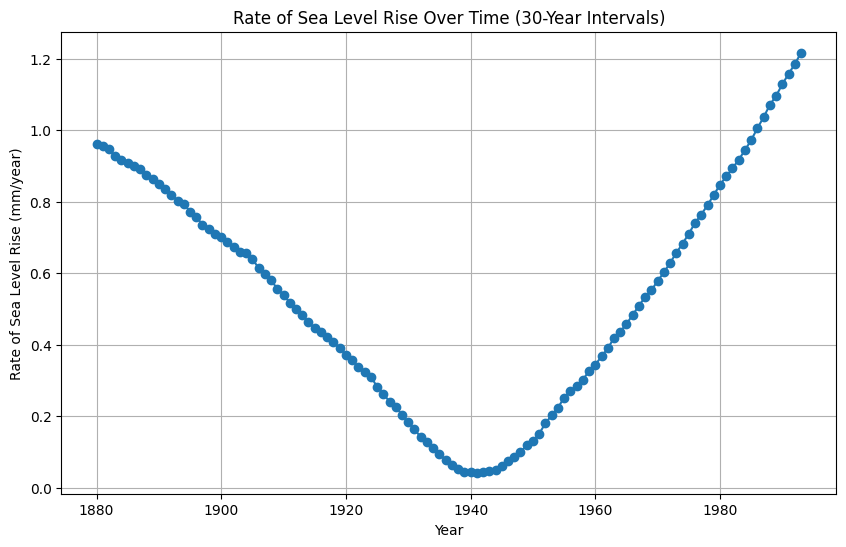

In [33]:
import numpy as np
slopes = []
years = []

for i in range(len(csiro) - 30):
    interval_data = csiro.iloc[i:i+30]
    model = SGDRegressor()
    model.fit(interval_data[["year_int_st"]], interval_data["adjusted_min_level_st"])

    unstandardized_slope = model.coef_[0] * csiro_std_min_level / csiro_std_year
    slopes.append(unstandardized_slope)
    years.append(interval_data["year_int"].iloc[0])

plt.figure(figsize=(10, 6))
plt.plot(years, slopes, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Rate of Sea Level Rise (mm/year)")
plt.title("Rate of Sea Level Rise Over Time (30-Year Intervals)")
plt.grid(True)
plt.show()




 Implications of the plot:

 Analyze the trend of slopes over time to see if the rate of sea level rise is accelerating or decelerating.

 Look for periods of significant change in the slope, indicating potential shifts in the drivers of sea level rise.

 Compare these results with other studies and data sources to determine if they are consistent.